In [ ]:
# # Please don't rerun this. Time consuming.

# #count the number of lines in csv
# !bash wc -l chicago_camera_tickets.csv
# #11557498
# !bash wc -l chicago_parking_tickets.csv
# #54430547

# #systematically sample every nth line, keeping the first line (header)
# !bash awk 'NR == 1 || NR % 10 == 0' chicago_camera_tickets.csv > camera_sample
# !bash awk 'NR == 1 || NR % 25 == 0' chicago_parking_tickets.csv > parking_sample

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas_profiling
import seaborn as sns

In [4]:
#read in data
parking = pd.read_csv(r'..\data\parking_2mil.csv', dtype=str)

In [5]:
#data cleaning
parking.issue_date = pd.to_datetime(parking.issue_date)
parking.fine_level1_amount = parking.fine_level1_amount.astype(int)
parking.fine_level2_amount = parking.fine_level2_amount.astype(int)
parking.current_amount_due = parking.current_amount_due.astype(float)
parking.total_payments = parking.total_payments.astype(float)
parking.ticket_queue_date = pd.to_datetime(parking.ticket_queue_date)
parking.geocode_accuracy = parking.geocode_accuracy.astype(float)
parking.geocoded_lng = parking.geocoded_lng.astype(float)
parking.geocoded_lat = parking.geocoded_lat.astype(float)

In [6]:
#feature engineering
parking.loc[parking['license_plate_number'] == 'c94d83c96b6835504fd7f59088b12a1953730dd882eac0dc089b1d1d250abf1b', 'license_plate_number'] = np.nan

def zipcode_cleaner(zipcode):
    try:
        if len(zipcode) not in (5, 9):
            return np.nan
        else:
            if int(zipcode) == 0:
                return np.nan
            elif int(zipcode[:4]) == 0:
                return zipcode[4:]
            elif int(zipcode[5:]) == 0:
                return zipcode[:5]
            else:
                return zipcode[:5]
    except:
        return np.nan
    
parking['zipcode_5_dig'] = parking.apply(lambda x: zipcode_cleaner(x['zipcode']), axis=1)
parking['violation_code_agg'] = parking.violation_code.str[:7]
parking['paid'] = parking['ticket_queue'] == 'Paid'
parking['fine_level'] = parking.apply(lambda x: '0' if x['ticket_queue'] == 'Dismissed' else ('2' if x['current_amount_due'] + x['total_payments'] > x['fine_level1_amount'] else '1'), axis=1)
parking['total_fine'] = parking['current_amount_due'] + parking['total_payments']

In [8]:
#parking.to_csv(r'data\parking_2mil_clean.csv', index=False)

In [10]:
#data exploration
pandas_profiling.ProfileReport(parking)

C:\Users\K\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,41
Number of observations,2177221
Total Missing (%),6.1%
Total size in memory,649.9 MiB
Average record size in memory,313.0 B
Numeric,7
Categorical,29
Boolean,1
Date,2
Text (Unique),1
Rejected,1


In [1]:
parking.columns

NameError: name 'parking' is not defined

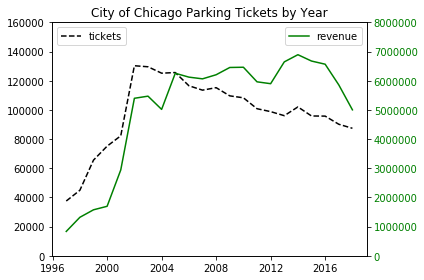

In [420]:
start_date = '01-01-1996'
end_date = '12-31-2017'

df = parking[parking['year'] != '2018']
df1 = parking.set_index('issue_date').loc[start_date: end_date].ticket_number.resample('Y').size()
df2 = parking.set_index('issue_date').loc[start_date: end_date].total_payments.resample('Y').sum()
df = df1.reset_index().merge(df2.reset_index())

fig, ax = plt.subplots()

color1 = 'black'
ax.set_title('City of Chicago Parking Tickets by Year')
#axes[0, 0].set_xlabel('year')
#axes[0, 0].set_ylabel('tickets', color=color1)
ax.plot(df1, color=color1, linestyle='dashed', label='tickets')
ax.tick_params(axis='y', labelcolor=color1)
ax.legend(loc='upper left')
ax.set_ylim(0, 160000)

ax2 = ax.twinx()

color2 = 'green'
#ax2.set_ylabel('revenue', color=color2)
ax2.plot(df2, color=color2, label='revenue')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.legend(loc='upper right')
ax2.set_ylim(0, 8000000)
ax2.set_xlabel('year')

plt.tight_layout()
plt.savefig('tickets_by_year.png')
plt.show()

In [8]:
years = np.arange(1996, 2017+1)

for year in years:
    print(parking[parking['year'] == str(year)].groupby('violation_code_agg').total_payments.count().sort_values(ascending=False)[:2].index)
    
codes = set(['0964125', '0964150',\
'0964125', '0964040',\
'0964125', '0964040',\
'0964125', '0964040',\
'0964125', '0964150',\
'0964125', '0964190',\
'0964125', '0964190',\
'0964190', '0964125',\
'0964125', '0976160',\
'0976160', '0964125',\
'0976160', '0964125',\
'0976160', '0964125',\
'0976160', '0964125',\
'0976160', '0964190',\
'0976160', '0964190',\
'0976160', '0964190',\
'0964125', '0976160',\
'0964125', '0976160',\
'0976160', '0964125',\
'0964125', '0976160',\
'0964125', '0976160',\
'0964125', '0964190'])

Index(['0964190', '0964150'], dtype='object', name='violation_code_agg')
Index(['0964125', '0964190'], dtype='object', name='violation_code_agg')
Index(['0964125', '0964190'], dtype='object', name='violation_code_agg')
Index(['0964125', '0964080'], dtype='object', name='violation_code_agg')
Index(['0964125', '0964190'], dtype='object', name='violation_code_agg')
Index(['0964190', '0964125'], dtype='object', name='violation_code_agg')
Index(['0964190', '0964125'], dtype='object', name='violation_code_agg')
Index(['0976160', '0964190'], dtype='object', name='violation_code_agg')
Index(['0976160', '0964190'], dtype='object', name='violation_code_agg')
Index(['0976160', '0964190'], dtype='object', name='violation_code_agg')
Index(['0976160', '0964190'], dtype='object', name='violation_code_agg')
Index(['0976160', '0964190'], dtype='object', name='violation_code_agg')
Index(['0976160', '0964190'], dtype='object', name='violation_code_agg')
Index(['0976160', '0964190'], dtype='object', name=

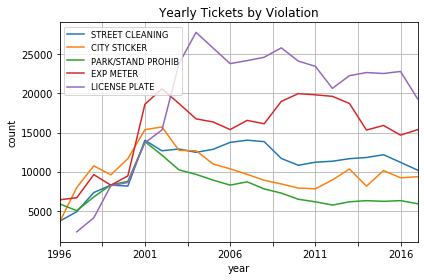

In [440]:
df = parking[parking['year'] != '2018']

fig, ax = plt.subplots()
df[(df['violation_code_agg'].isin(codes))].groupby(['year', 'violation_code_agg'])['total_payments'].count().unstack().plot(ax=ax)
ax.set_ylabel('count')
ax.legend(['STREET CLEANING', 'CITY STICKER', 'PARK/STAND PROHIB', 'EXP METER', 'LICENSE PLATE'], fontsize='small')
ax.set_title('Yearly Tickets by Violation')

plt.grid()
plt.tight_layout()
plt.savefig('tickets_by_viol.png')
plt.show()

In [ ]:
years = np.arange(1996, 2017+1)

for year in years:
    print(parking[parking['year'] == str(year)].groupby('violation_code_agg').total_payments.sum().sort_values(ascending=False)[:2].index)
    
codes = set(['0964125', '0964150',\
'0964125', '0964040',\
'0964125', '0964040',\
'0964125', '0964040',\
'0964125', '0964150',\
'0964125', '0964190',\
'0964125', '0964190',\
'0964190', '0964125',\
'0964125', '0976160',\
'0976160', '0964125',\
'0976160', '0964125',\
'0976160', '0964125',\
'0976160', '0964125',\
'0976160', '0964190',\
'0976160', '0964190',\
'0976160', '0964190',\
'0964125', '0976160',\
'0964125', '0976160',\
'0976160', '0964125',\
'0964125', '0976160',\
'0964125', '0976160',\
'0964125', '0964190'])

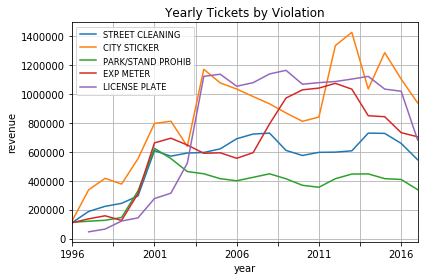

In [9]:
df = parking[parking['year'] != '2018']

fig, ax = plt.subplots()
df[(df['violation_code_agg'].isin(codes))].groupby(['year', 'violation_code_agg'])['total_payments'].sum().unstack().plot(ax=ax)
ax.set_ylabel('revenue')
ax.legend(['STREET CLEANING', 'CITY STICKER', 'PARK/STAND PROHIB', 'EXP METER', 'LICENSE PLATE'], fontsize='small')
ax.set_title('Yearly Tickets by Violation')

plt.grid()
plt.tight_layout()
plt.savefig('rev_by_viol.png')
plt.show()

In [284]:
parking[parking['violation_code_agg'].isin(['0976160','0964190','0964040', '0964125','0964080'])][['violation_code', 'violation_description']].sort_values('violation_code').groupby('violation_code').first()

,violation_description
violation_code,
0964040A,STREET CLEANING
0964040B,STREET CLEANING OR SPECIAL EVENT
0964080A,RUSH HOUR PARKING
0964080B,NO STANDING/PARKING TIME RESTRICTED
0964080C,NO STANDING/PARKING TIME RESTRICTED
0964125,NO CITY STICKER OR IMPROPER DISPLAY
0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ..."
0964125C,"NO CITY STICKER VEHICLE OVER 16,000 LBS."
0964125D,IMPROPER DISPLAY OF CITY STICKER


In [285]:
parking.groupby('violation_code_agg').ticket_number.count().sort_values(ascending=False)[:5]

violation_code_agg
0976160    413376
0964190    344767
0964040    242721
0964125    222952
0964080    186782
Name: ticket_number, dtype: int64

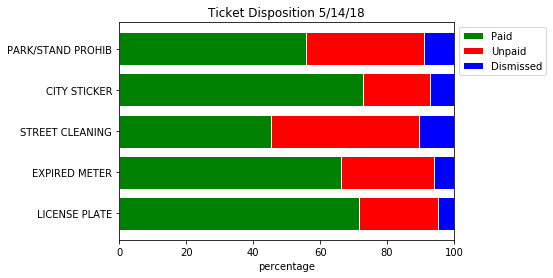

In [455]:
# Data
r = [0,1,2,3,4]
df = parking[parking['violation_code_agg'].isin(['0976160', '0964190', '0964040', '0964125', '0964080'])]
df1 = df.groupby(['violation_code_agg', 'ticket_queue']).ticket_number.count().unstack()
df1['Total'] = df1.sum(axis=1)
df1['Unpaid'] = df1.drop(['Dismissed', 'Paid', 'Total'], axis=1).sum(axis=1)
df = df1
df['Paid'] = df['Paid'] / df['Total']
df['Unpaid'] = df['Unpaid'] / df['Total']
df['Dismissed'] = df['Dismissed'] / df['Total']
df = df[['Paid', 'Unpaid', 'Dismissed']]

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['Paid'], df['Unpaid'], df['Dismissed'])]
greenBars = [i / j * 100 for i,j in zip(df['Paid'], totals)]
redBars = [i / j * 100 for i,j in zip(df['Unpaid'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['Dismissed'], totals)]

# plot
#barWidth = 0.85
names = ('LICENSE PLATE','EXPIRED METER','STREET CLEANING','CITY STICKER','PARK/STAND PROHIB')
# Create green Bars
plt.barh(r, greenBars, color='green', edgecolor='white', label='Paid')
# Create orange Bars
plt.barh(r, redBars, left=greenBars, color='red', edgecolor='white', label='Unpaid')
# Create blue Bars
plt.barh(r, blueBars, left=[i+j for i,j in zip(greenBars, redBars)], color='blue', edgecolor='white', label='Dismissed')
 
# Custom x axis
plt.yticks(r, names)
#plt.ylabel("group")
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlim(0, 100)
plt.xlabel('percentage')
plt.title('Ticket Disposition 5/14/18')

# Show graphic
#plt.tight_layout()
plt.savefig('ticket_disposition.png', bbox_inches='tight')
plt.show()

In [429]:
df = parking.groupby(['license_plate_number', 'vehicle_make']).ticket_number.count().sort_values(ascending=False).reset_index()
parking[parking['license_plate_number'] == df.iloc[1, 0]].sort_values('issue_date').set_index('issue_date').loc[:,['geocoded_address','violation_description','license_plate_type','current_amount_due', 'total_payments']].head(5).to_csv('view.csv')

,geocoded_address,violation_description,license_plate_type,current_amount_due,total_payments,fine_level
issue_date,,,,,,
2000-05-06 09:25:00,"200 S Clark St, Chicago, IL 60604",PARKING/STANDING PROHIBITED ANYTIME,TRK,0.0,100.0,2
2000-05-15 17:41:00,"Chicago, IL 60601",PARKING/STANDING PROHIBITED ANYTIME,PAS,50.0,0.0,1
2000-06-22 17:41:00,"300 S Clark St, Chicago, IL 60605",WITHIN 15' OF FIRE HYDRANT,TRK,0.0,200.0,2
2000-08-10 15:54:00,"300 S Clark St, Chicago, IL 60605",PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,TRK,0.0,60.0,2
2000-08-21 17:15:00,"300 S Clark St, Chicago, IL 60605",NO STANDING/PARKING TIME RESTRICTED,TRK,0.0,100.0,2


In [289]:
# import folium
# from folium.plugins import FastMarkerCluster

In [290]:
# chi_lat = parking['geocoded_lat'].median()
# chi_lon = parking['geocoded_lng'].median()
# chi_map = folium.Map(location=[chi_lat, chi_lon], zoom_start=10)

In [291]:
# subset_df = parking[parking['officer'] == '728']

# chi_map.add_child(FastMarkerCluster(parking[parking['geocoded_lat'].notnull()][['geocoded_lat', 'geocoded_lng']].sample(60).values.tolist()))
# chi_map

In [292]:
# Which violations generated the most revenue in fiscal year 2017 (last full fiscal year)
start_date = '01-01-2017'
end_date = '12-31-2017'

parking.set_index('issue_date').loc[start_date:end_date].groupby(['violation_code', 'violation_description']).sum()[['total_payments']].sort_values(by='total_payments', ascending=False)[:60]

,,total_payments
violation_code,violation_description,
0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.",924032.51
0964040B,STREET CLEANING,544842.56
0964090E,RESIDENTIAL PERMIT PARKING,501186.09
0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,411177.41
0964150B,PARKING/STANDING PROHIBITED ANYTIME,338213.08
0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,301320.83
0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,279289.74
0964080B,NO STANDING/PARKING TIME RESTRICTED,248770.76
0964080A,RUSH HOUR PARKING,210061.20


In [293]:
#for markdown table columns
print([desc.capitalize() for desc in parking.set_index('issue_date').loc[start_date:end_date].groupby('violation_description').total_payments.sum().sort_values(ascending=False)[:5].index],

parking.set_index('issue_date').loc[start_date:end_date].groupby('violation_code').sum().total_payments.sort_values(ascending=False)[:5].index)

['No city sticker vehicle under/equal to 16,000 lbs.', 'Street cleaning', 'Residential permit parking', 'Exp. meter non-central business district', 'Parking/standing prohibited anytime'] Index(['0964125B', '0964040B', '0964090E', '0964190A', '0964150B'], dtype='object', name='violation_code')


In [294]:
length = parking[parking['violation_code'].isin([code])].shape[0]
df1 = pd.DataFrame(parking[parking['violation_code'].isin([code])].sort_values('issue_date').set_index('issue_date')['paid'].cumsum()/np.arange(1, length+1))
# plt.title(parking[parking['violation_code'] == code].violation_description.iloc[0])
# plt.ylim(0, 1)
# plt.show()

df2 = parking[parking['violation_code'] == code].sort_values('issue_date').set_index('issue_date')['fine_level1_amount']
# plt.title(code)
# plt.show()

In [427]:
def plotter(ax, code, title):
    df = parking[parking['fine_level'] == '2']
    length = df[df['violation_code'].isin([code])].shape[0]
    df1 = pd.DataFrame(df[df['violation_code'].isin([code])].sort_values('issue_date').set_index('issue_date')['paid'].cumsum()/np.arange(1, length + 1))
    df2 = df[df['violation_code'] == code].sort_values('issue_date')[['issue_date', 'fine_level2_amount']]
    df = df1.reset_index().merge(df2)

    color1 = 'tab:blue'
    ax.plot(df["issue_date"], df["paid"], color=color1)
    ax.set_xlabel('ticket issue date')
    ax.set_ylabel('cumulative proportion paid', color=color1)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='y', labelcolor=color1)
    ax.set_title(title)
#    ax.grid()

    color2 = 'tab:green'
    ax2 = ax.twinx()
    ax2 = df.plot(x="issue_date", y="fine_level2_amount", ax=ax2, legend=False, color=color2)
    ax2.set_ylabel('level 2 fine amount', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
#    ax.set_xticks([])

def plotter2(ax, code, title):
    df = parking[parking['fine_level'] == '2']
    length = df[df['violation_code'].isin([code])].shape[0]
    df1 = pd.DataFrame(df[df['violation_code'].isin([code])].sort_values('issue_date').set_index('issue_date')['paid'].cumsum()/np.arange(1, length + 1))
    df2 = df[df['violation_code'] == code].sort_values('issue_date')[['issue_date', 'fine_level2_amount']]
    df = df1.reset_index().merge(df2)

    color1 = 'tab:blue'
    ax.plot(parking[parking['violation_code'] == code].set_index('issue_date')['total_payments'].resample('Q').sum().reset_index()["issue_date"], parking[parking['violation_code'] == code].set_index('issue_date')['total_payments'].resample('Q').sum().reset_index()["total_payments"], color=color1)
    ax.set_xlabel('ticket issue date')
    ax.set_ylabel('quarterly revenue', color=color1)
#    ax.set_ylim(0, 1)
    ax.tick_params(axis='y', labelcolor=color1)
    ax.set_title(title)
#    ax.grid()

    color2 = 'tab:green'
    ax2 = ax.twinx()
    ax2 = df.plot(x="issue_date", y="fine_level2_amount", ax=ax2, legend=False, color=color2)
    ax2.set_ylabel('fine amount', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
#    ax.set_xticks([])



0964080A


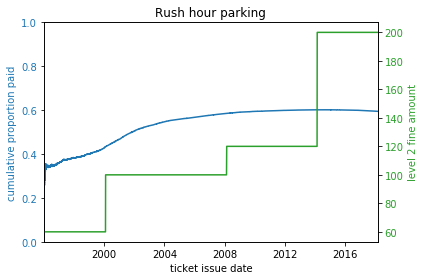

In [457]:
start_n = 6
end_n = 7
codes = parking.set_index('issue_date').loc[start_date:end_date].groupby('violation_code').sum().total_payments.sort_values(ascending=False)[start_n:end_n].index
titles = [desc.capitalize() for desc in parking.set_index('issue_date').loc[start_date:end_date].groupby('violation_description').sum().total_payments.sort_values(ascending=False)[start_n:end_n].index]

for code, title in zip(codes, titles):
    print(code)
    fig, ax = plt.subplots()
    plotter(ax, code, title)
    plt.tight_layout()
    plt.savefig('ticket_payprob_and_price.png')
    plt.show()
    
#     fig, ax = plt.subplots()
#     plotter2(ax, code, title)
#     plt.tight_layout()
#     plt.show()


In [5]:
# Hypothesis testing for violation_code '0964080B', 'NO STANDING/PARKING TIME RESTRICTED'
# H0: p_after = p_before
# Ha: p_after < p_before

def proportions_diff_tester(event_date, days, violation, level):
    before = (datetime.datetime.strptime(event_date, '%m-%d-%Y') - pd.DateOffset(days=days)).strftime('%m-%d-%Y')
    after = (datetime.datetime.strptime(event_date, '%m-%d-%Y') + pd.DateOffset(days=days)).strftime('%m-%d-%Y')
    df = parking[(parking['fine_level'] == level) & (parking['violation_code'] == violation)].set_index('issue_date')

    x_before = df.loc[before:event_date].paid.sum()
    n_before = df.loc[before:event_date].shape[0]
    p_before = x_before / n_before

    x_after = df.loc[event_date:after].paid.sum()
    n_after = df.loc[event_date:after].shape[0]
    p_after = x_after / n_after

    p_pool = (x_before + x_after) / (n_before + n_after)

    # test statistic: (p_after - p_before) / (p_pool * (1 - p_pool) * (1 / (n_before) + 1 / (n_after))) ** 0.5
    test_stat = (p_after - p_before) / (p_pool * (1 - p_pool) * (1 / (n_before) + 1 / (n_after))) ** 0.5
    import scipy.stats as stats
    p_value = stats.norm().cdf(test_stat)

    # conclusions
    print(f'p_before:{p_before:.4f}\t n_before:{n_before}\n\
p_after:{p_after:.4f}\t n_after:{n_after}\n\
H0: p_after = p_before\n\
Ha: p_after < p_before\n\
test_stat:{test_stat:.4f}\t p-value:{p_value:.4f}')

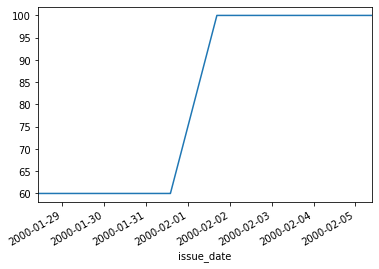

p_before:0.5902	 n_before:471
p_after:0.6712	 n_after:590
H0: p_after = p_before
Ha: p_after < p_before
test_stat:2.7217	 p-value:0.9968


In [8]:
import datetime
event_date = '02-01-2000'
days = 4
violation = '0964080B'
level = '2'

before = (datetime.datetime.strptime(event_date, '%m-%d-%Y') - pd.DateOffset(days=days)).strftime('%m-%d-%Y')
after = (datetime.datetime.strptime(event_date, '%m-%d-%Y') + pd.DateOffset(days=days)).strftime('%m-%d-%Y')

parking[(parking['fine_level'] == level) & (parking['violation_code'] == '0964080B')].set_index('issue_date').loc[before:after].fine_level2_amount.plot()
plt.show()

days = 30 * 6
proportions_diff_tester(event_date, days, violation, level)

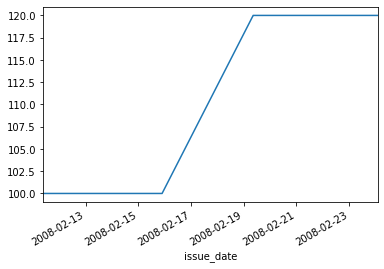

p_before:0.7434	 n_before:339
p_after:0.7507	 n_after:345
H0: p_after = p_before
Ha: p_after < p_before
test_stat:0.2215	 p-value:0.5876


In [9]:
import datetime
event_date = '02-17-2008'
days = 7
violation = '0964080B'
level = '2'

before = (datetime.datetime.strptime(event_date, '%m-%d-%Y') - pd.DateOffset(days=days)).strftime('%m-%d-%Y')
after = (datetime.datetime.strptime(event_date, '%m-%d-%Y') + pd.DateOffset(days=days)).strftime('%m-%d-%Y')

parking[(parking['fine_level'] == level) & (parking['violation_code'] == '0964080B')].set_index('issue_date').loc[before:after].fine_level2_amount.plot()
plt.show()

days = 30 * 6
proportions_diff_tester(event_date, days, violation, level)

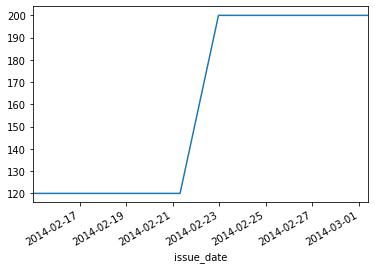

p_before:0.7218	 n_before:381
p_after:0.6396	 n_after:419
H0: p_after = p_before
Ha: p_after < p_before
test_stat:-2.4857	 p-value:0.0065


In [7]:
import datetime
event_date = '02-22-2014'
days = 7
violation = '0964080B'
level = '2'

before = (datetime.datetime.strptime(event_date, '%m-%d-%Y') - pd.DateOffset(days=days)).strftime('%m-%d-%Y')
after = (datetime.datetime.strptime(event_date, '%m-%d-%Y') + pd.DateOffset(days=days)).strftime('%m-%d-%Y')

parking[(parking['fine_level'] == level) & (parking['violation_code'] == '0964080B')].set_index('issue_date').loc[before:after].fine_level2_amount.plot()
plt.show()

days = 30 * 6
proportions_diff_tester(event_date, days, violation, level)

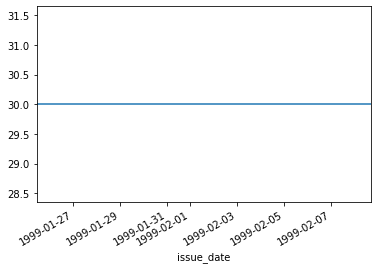

p_before:0.1284	 n_before:483
p_after:0.1369	 n_after:548
H0: p_after = p_before
Ha: p_after < p_before
test_stat:0.4011	 p-value:0.6558


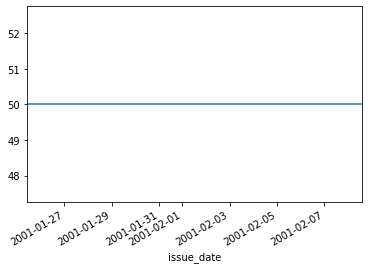

p_before:0.4708	 n_before:650
p_after:0.6931	 n_after:1235
H0: p_after = p_before
Ha: p_after < p_before
test_stat:9.4364	 p-value:1.0000


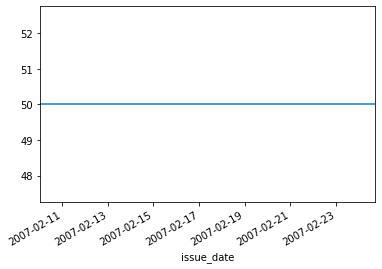

p_before:0.8596	 n_before:805
p_after:0.8575	 n_after:807
H0: p_after = p_before
Ha: p_after < p_before
test_stat:-0.1227	 p-value:0.4512


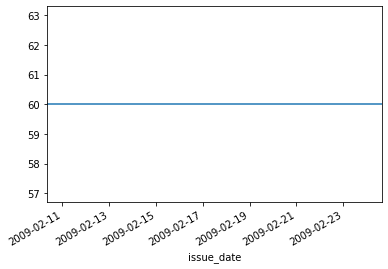

p_before:0.8810	 n_before:748
p_after:0.8502	 n_after:868
H0: p_after = p_before
Ha: p_after < p_before
test_stat:-1.8028	 p-value:0.0357


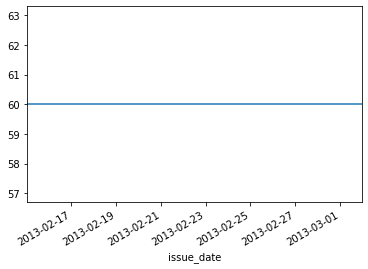

p_before:0.9053	 n_before:1236
p_after:0.9047	 n_after:1353
H0: p_after = p_before
Ha: p_after < p_before
test_stat:-0.0592	 p-value:0.4764


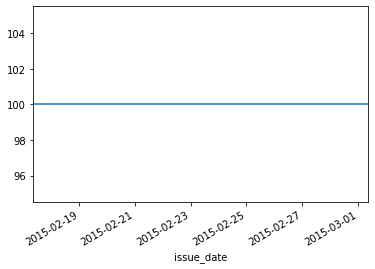

p_before:0.8961	 n_before:1136
p_after:0.9095	 n_after:1226
H0: p_after = p_before
Ha: p_after < p_before
test_stat:1.0943	 p-value:0.8631


In [25]:
import datetime
#event_dates = ['02-01-2000', '02-17-2008', '02-22-2014']
event_dates = ['02-01-1999', '02-01-2001', '02-17-2007', '02-17-2009', '02-22-2013', '02-22-2015']

for event_date in event_dates:
    days = 7
    violation = '0964080B'
    level = '1'
    
    before = (datetime.datetime.strptime(event_date, '%m-%d-%Y') - pd.DateOffset(days=days)).strftime('%m-%d-%Y')
    after = (datetime.datetime.strptime(event_date, '%m-%d-%Y') + pd.DateOffset(days=days)).strftime('%m-%d-%Y')

    parking[(parking['fine_level'] == level) & (parking['violation_code'] == '0964080B')].set_index('issue_date').loc[before:after].fine_level1_amount.plot()
    plt.show()

    days = 30 * 6
    proportions_diff_tester(event_date, days, violation, level)

In [16]:
parking[(parking['fine_level'] == '2') & (parking['violation_code'] == '0964080B')]

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,geocode_accuracy,geocode_accuracy_type,geocoded_address,geocoded_lng,geocoded_lat,zipcode_5_dig,violation_code_agg,paid,fine_level,total_fine
84,33938946,2000-09-22 12:14:00,1132 N STATE,3673480256eba6cca95993ac58390d98ee447d957c026e...,IL,PAS,605160000,0964080B,NO STANDING/PARKING TIME RESTRICTED,18,...,0.6,rooftop,"1100 N State St, Chicago, IL 60610",-87.628557,41.902092,60516,0964080,False,2,122.0
226,33823191,2001-03-04 12:05:00,1133 N STATE,0b2bc8c4503561d294c78d0ba6ed38e1811b53f6a5b322...,IL,PAS,600740000,0964080B,NO STANDING/PARKING TIME RESTRICTED,18,...,0.6,rooftop,"1100 N State St, Chicago, IL 60610",-87.628557,41.902092,60074,0964080,False,2,122.0
241,41656124,2003-03-24 01:43:00,1965 W OGDEN,1852badc1fc81e5828d9e49e668949caf292fa8d308439...,IL,PAS,60608,0964080B,NO STANDING/PARKING TIME RESTRICTED,12,...,1.0,range_interpolation,"1900 W Ogden Ave, Chicago, IL 60612",-87.674049,41.874593,NaN,0964080,True,2,100.0
328,35324302,2001-03-05 10:20:00,20 W RANDOLPH,770b586d41b2fac0639b4c8687e083339015f49014b108...,IL,PAS,606290000,0964080B,NO STANDING/PARKING TIME RESTRICTED,152,...,1.0,range_interpolation,"1 W Randolph St, Chicago, IL 60606",-87.627910,41.884640,60629,0964080,True,2,100.0
344,34471865,2000-09-25 15:46:00,111 S CLARK,a287aae3eaa54cdc346577a67c626276dd2db62cd15dc2...,IL,TRK,606480000,0964080B,NO STANDING/PARKING TIME RESTRICTED,152,...,1.0,rooftop,"100 S Clark St, Chicago, IL 60603",-87.631145,41.880468,60648,0964080,True,2,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176935,28213300,1998-12-24 19:50:00,2601 W 24TH,6fd357ffedfeaf835a29abf7235e748813ebcec11a7109...,IL,PAS,606080000,0964080B,NO STANDING/PARKING TIME RESTRICTED,10,...,0.6,rooftop,"2600 W 24th Pl, Chicago, IL 60608",-87.690607,41.847883,60608,0964080,False,2,73.2
2176959,41634095,2003-03-17 18:00:00,61 W ONTARIO,8fa86fb189bf31ad1d1fec9b4b992e6d73c86be29571c3...,IL,PAS,60466,0964080B,NO STANDING/PARKING TIME RESTRICTED,18,...,1.0,range_interpolation,"1 W Ontario St, Chicago, IL 60654",-87.628115,41.893421,NaN,0964080,True,2,100.0
2176969,9016826833,2000-09-15 12:35:00,1545 W 18TH ST,627d7ee0664732eda09a827e42a3af43b268f384712fd1...,IL,RVM,606160000,0964080B,NO STANDING/PARKING TIME RESTRICTED,498,...,1.0,rooftop,"1500 W 18th St, Chicago, IL 60608",-87.663939,41.858100,60616,0964080,False,2,122.0
2177114,38692535,2002-02-28 08:34:00,1611 S ALLPORT,d55abd366efad202bceed8de21501c5299fc75c0ca2f46...,IL,PAS,606290000,0964080B,NO STANDING/PARKING TIME RESTRICTED,12,...,1.0,rooftop,"1600 S Allport St, Chicago, IL 60608",-87.658055,41.859623,60629,0964080,True,2,100.0


In [69]:
def multi_plotter(ax, code, title):
    length = parking[parking['violation_code'].isin([code])].shape[0]
    df1 = pd.DataFrame(parking[parking['violation_code'].isin([code])].sort_values('issue_date').set_index('issue_date')['paid'].cumsum()/np.arange(1, length + 1))
    df2 = parking[parking['violation_code'] == code].sort_values('issue_date')[['issue_date', 'fine_level1_amount']]
    df = df1.reset_index().merge(df2)

    color1 = 'tab:blue'
    ax.plot(df["issue_date"], df["paid"], color=color1)
#    ax.set_xlabel('ticket issue date')
#    ax.set_ylabel('proportion paid', color=color1)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='y', labelcolor=color1)
#    ax.set_title(title)
    ax.grid()

    color2 = 'tab:green'
    ax2 = ax.twinx()
    ax2 = df.plot(x="issue_date", y="fine_level1_amount", ax=ax2, legend=False, color=color2)
#    ax2.set_ylabel('fine amount', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax.set_xticks([])

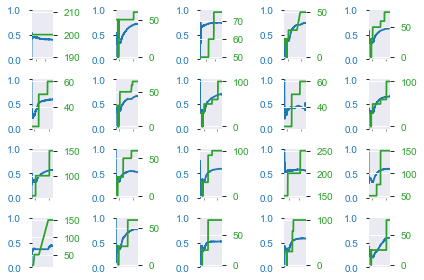

In [70]:
top_n = 20
codes = parking.set_index('issue_date').loc[start_date:end_date].groupby('violation_code').sum().total_payments.sort_values(ascending=False)[:top_n].index
titles = [desc.capitalize() for desc in parking.set_index('issue_date').loc[start_date:end_date].groupby('violation_description').sum().total_payments.sort_values(ascending=False)[:top_n].index]

figs, axs = plt.subplots(4, 5)

for ax, code, title in zip(axs.flat, codes, titles):
    multi_plotter(ax, code, title)

plt.tight_layout()
plt.show()

In [201]:
zipcodes = [46320,
46327,
60007,
60018,
60068,
60076,
60077,
60106,
60131,
60171,
60176,
60202,
60302,
60304,
60305,
60402,
60406,
60409,
60419,
60453,
60456,
60459,
60501,
60601,
60602,
60603,
60604,
60605,
60606,
60607,
60608,
60609,
60610,
60611,
60612,
60613,
60614,
60615,
60616,
60617,
60618,
60619,
60620,
60621,
60622,
60623,
60624,
60625,
60626,
60628,
60629,
60630,
60631,
60632,
60633,
60634,
60636,
60637,
60638,
60639,
60640,
60641,
60642,
60643,
60644,
60645,
60646,
60647,
60649,
60651,
60652,
60653,
60654,
60655,
60656,
60657,
60659,
60660,
60661,
60706,
60707,
60712,
60714,
60803,
60804,
60805,
60827]

In [74]:
# Don't touch license_plate_numbers. Just exclude weird values from plotting.
# invalid = ['c94d83c96b6835504fd7f59088b12a1953730dd882eac0dc089b1d1d250abf1b',
#           '21821a595e6c51a69ed3e6f17ec4a9dac9bf1e7300edbedbe2fb3df207414c0f',
#           '9a366ff551e6790a63d166fc0148285855fa5e1cd8c9255d8d2aa7b99eb0d808']
# for plate in invalid:
#     parking.loc[parking['license_plate_number'] == plate, 'license_plate_number'] = np.NaN
